<a href="https://colab.research.google.com/github/Sujan-Sawant/OLA-Driver-Attrition-Prediction-/blob/main/OLA_Business_Case_Study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

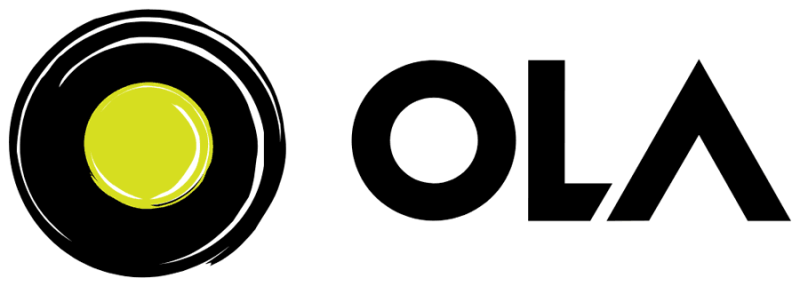

## <font color= Green>**Context:**</font>
- **Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.**
- **As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.**


##<font color = Red>**Business Problem:**

**You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like**
- **Demographics (city, age, gender etc.)**
- **Tenure information (joining date, Last Date)**
- **Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income**



## <font color = Green>**Data dictionary:** </font>
- **1. MMMM-YY:** Reporting Date (Monthly).
- **2.	Driver_ID  :** Unique id for drivers.
- **3.	Age  :** Age of the driver.
- **4.	Gender  :** Gender of the driver – Male : 0, Female: 1.
- **5.	City  :** City Code of the driver.
- **6.	Education_Level  :** Education level – 0 for 10+ ,1 for 12+ ,2 for graduate.
- **7.	Income  :** Monthly average Income of the driver.
- **8.	Date Of Joining  :** Joining date for the driver.
- **9.	LastWorkingDate  :** Last date of working for the driver.
- **10.	Joining Designation  :** Designation of the driver at the time of joining.
- **11.	Grade  :** Grade of the driver at the time of reporting.
- **12.	Total Business Value  :** The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments).
- **13. Quarterly Rating  :** Quarterly rating of the driver: 1,2,3,4,5 (higher is better).


## <font color = Green> **Solution Approach** </font>
- **Concept used:**
 - **Ensemble Learning- Bagging**
 - **Ensemble Learning- Boosting**
 - **KNN Imputation of Missing Values**
 - **Working with an imbalanced dataset**



- **imported the dataset and performed the usual exploratory data analysis (EDA), checking the structure and characteristics of the dataset.**
- **Converted date-like features to their respective data type.**
- **Checked for missing values and Prepared data for KNN Imputation**
- **Aggregated data in order to remove multiple occurrences of same driver data.**
- **Carried out some Feature Engineering Steps such as :**
 - **Created a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1**
 - **Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1**
 - **Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1**
- **Statistical summary of the derived dataset**
- **Checked correlation among independent variables and how they interact with each other**
- Encodinging of the categorical variable**
- **Class Imbalance Treatment**
- **Standardization of training data**
- **Using Ensemble learning:**
 - **Bagging,**
 - **Boosting methods**
 - **with some hyper-parameter tuning**
- **Results Evaluation:**
 - **Classification Report**
 - **ROC AUC curve**
- **Provide actionable Insights & Recommendations**



In [ ]:
# Downloding the data set
!gdown 1DD_UmXzBfagEM7ExP4KV1AaS9niQ4ov3

Downloading...
From: https://drive.google.com/uc?id=1DD_UmXzBfagEM7ExP4KV1AaS9niQ4ov3
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 45.9MB/s]


In [ ]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading or Loading a CSV file into a pandas DataFrame.
df = pd.read_csv("/content/ola_driver_scaler.csv")

In [ ]:
# Viewing the first few rows of a DataFrame.
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
# Viewing the last few rows of a DataFrame.
df.tail()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2
19103,19103,12/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,411480,2


In [ ]:
# Retrieving the dimensions of a DataFrame (Rows, Columns).
df.shape

(19104, 14)

In [ ]:
# Retrieving the column labels (names) of a DataFrame .
df.columns

Index(['Unnamed: 0', 'MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City',
       'Education_Level', 'Income', 'Dateofjoining', 'LastWorkingDate',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

In [ ]:
# Display the data type of each column in a DataFrame
df.dtypes

,0
Unnamed: 0,int64
MMM-YY,object
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,int64
Dateofjoining,object
LastWorkingDate,object


In [ ]:
# Retrive the overview of a DataFrame's structure and content.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [ ]:
# Retrieving statistics of the numerical columns in a DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,19104.0,9551.500000,5.514994e+03,0.0,4775.75,9551.5,14327.25,19103.0
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.00,1417.0,2137.00,2788.0
Age,19043.0,34.668435,6.257912e+00,21.0,30.00,34.0,39.00,58.0
Gender,19052.0,0.418749,4.933670e-01,0.0,0.00,0.0,1.00,1.0
Education_Level,19104.0,1.021671,8.001671e-01,0.0,0.00,1.0,2.00,2.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.00,60087.0,83969.00,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.00,1.0,2.00,5.0
Grade,19104.0,2.252670,1.026512e+00,1.0,1.00,2.0,3.00,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.00,250000.0,699700.00,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.00,2.0,3.00,4.0


In [ ]:
# Display the number of missing values (NaN) in each column of the DataFrame
df.isnull().sum()/df.shape[0] * 100

,0
Unnamed: 0,0.000000
MMM-YY,0.000000
Driver_ID,0.000000
Age,0.319305
Gender,0.272194
City,0.000000
Education_Level,0.000000
Income,0.000000
Dateofjoining,0.000000
LastWorkingDate,91.541039


## **Exploratory Data Analysis and Data Cleaning (EDA)**

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
MMM-YY,object
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,int64
Dateofjoining,object
LastWorkingDate,object


In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [ ]:
# Drop the unnecessary column
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [ ]:
# Fixing 'MMM-YY' column, with two-digit year format '%d/%m/%y'
df["MMM-YY"] = pd.to_datetime(df["MMM-YY"], format='%d/%m/%y', errors='coerce')

# Fixing 'Dateofjoining' column, with two-digit year format '%d/%m/%y'
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"], format='%d/%m/%y', errors='coerce')

# Fixing 'LastWorkingDate' column (assuming it has correct date format)
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"], errors='coerce')


In [ ]:
df.dtypes

,0
MMM-YY,datetime64[ns]
Driver_ID,int64
Age,float64
Gender,float64
City,object
Education_Level,int64
Income,int64
Dateofjoining,datetime64[ns]
LastWorkingDate,datetime64[ns]
Joining Designation,int64


## <font color = "yellow">**Aggregate data in order to remove multiple occurrences of same driver data**</font>


In [ ]:
df = df.groupby('Driver_ID').agg({
    'MMM-YY': 'first',                  # First reporting date for each driver
    'Age': 'first',                      # First age (assuming it doesn't change)
    'Gender': 'first',                   # First gender
    'City': 'first',                     # First city
    'Education_Level': 'first',          # First education level
    'Income': 'mean',                    # Average income
    'Dateofjoining': 'first',          # First joining date
    'LastWorkingDate': lambda x: x.iloc[0] if x.isnull().all() else x.dropna().iloc[0],  # Custom logic to retain NaN
    'Joining Designation': 'first',      # First joining designation
    'Grade': 'max',                      # Maximum grade (most recent)
    'Total Business Value': 'sum',       # Sum of business value
    'Quarterly Rating': 'mean'           # Average quarterly rating
}).reset_index()

In [ ]:
df.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,2019-01-01,28.0,0.0,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.0
1,2,2020-01-11,31.0,0.0,C7,2,67016.0,2020-06-11,NaT,2,2,0,1.0
2,4,2019-01-12,43.0,0.0,C13,2,65603.0,2019-07-12,2020-04-27,2,2,350000,1.0
3,5,2019-01-01,29.0,0.0,C9,0,46368.0,2019-09-01,2019-03-07,1,1,120360,1.0
4,6,2020-01-08,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,3,1265000,1.6


In [ ]:
## Statistical Summary
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Driver_ID,2381.0,1397.559009,1.0,695.0,1400.0,2100.0,2788.0,806.161628
MMM-YY,2381,2019-05-11 06:16:46.971860480,2019-01-01 00:00:00,2019-01-01 00:00:00,2019-01-07 00:00:00,2020-01-05 00:00:00,2020-01-12 00:00:00,NaN
Age,2381.0,33.090718,21.0,29.0,33.0,37.0,58.0,5.840686
Gender,2381.0,0.410332,0.0,0.0,0.0,1.0,1.0,0.491997
Education_Level,2381.0,1.00756,0.0,0.0,1.0,2.0,2.0,0.81629
Income,2381.0,59232.460484,10747.0,39104.0,55285.0,75835.0,188418.0,28298.214012
Dateofjoining,2381,2019-01-27 12:58:58.009239808,2013-01-04 00:00:00,2018-06-26 00:00:00,2019-06-23 00:00:00,2020-04-14 00:00:00,2020-12-28 00:00:00,NaN
LastWorkingDate,1616,2019-12-21 20:59:06.534653440,2018-12-31 00:00:00,2019-06-06 00:00:00,2019-12-20 12:00:00,2020-07-03 00:00:00,2020-12-28 00:00:00,NaN
Joining Designation,2381.0,1.820244,1.0,1.0,2.0,2.0,5.0,0.841433
Grade,2381.0,2.097018,1.0,1.0,2.0,3.0,5.0,0.941702


## <font color = "yellow">**Feature Engineering**

- Create a column which tells whether the quarterly rating has increased for that driver - for those whose quarterly rating has increased we assign the value 1
- Target variable creation: Create a column called target which tells whether the driver has left the company- driver whose last working day is present will have the value 1
- Create a column which tells whether the monthly income has increased for that driver - for those whose monthly income has increased we assign the value 1


In [ ]:
df['Quarterly_Rating_Increased'] = (df.groupby('Driver_ID')['Quarterly Rating']
                                    .shift(1) < df['Quarterly Rating']).astype(int)
df["Target"] = df["LastWorkingDate"].map(lambda x: 0 if pd.isnull(x) else 1)
df['Income_Increased'] = (df.groupby('Driver_ID')['Income']
                          .shift(1) < df['Income']).astype(int)


In [ ]:
df.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Target,Income_Increased
0,1,2019-01-01,28.0,0.0,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.0,0,1,0
1,2,2020-01-11,31.0,0.0,C7,2,67016.0,2020-06-11,NaT,2,2,0,1.0,0,0,0
2,4,2019-01-12,43.0,0.0,C13,2,65603.0,2019-07-12,2020-04-27,2,2,350000,1.0,0,1,0
3,5,2019-01-01,29.0,0.0,C9,0,46368.0,2019-09-01,2019-03-07,1,1,120360,1.0,0,1,0
4,6,2020-01-08,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,3,1265000,1.6,0,0,0


## <font color= "yellow"> **Missing Value Treatment**</font>


### **Identify Missing Values and Perform Imputation Using KNN Imputer**


In [ ]:
# Display the number of missing values (NaN) in each column of the DataFrame
df.isnull().sum()

,0
Driver_ID,0
MMM-YY,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,765
Joining Designation,0


### **From the analysis above, it is clear that there are no missing values in any of the features, except for the *LastWorkingDate* column. The presence of values in this column indicates that the drivers have left the company, while missing values (NaT) suggest that the drivers are still employed. Therefore, imputing these values is unnecessary, as keeping them intact will be beneficial for model performance.**

In [ ]:
df.drop(columns = ["LastWorkingDate"], inplace = True)

## <font color = "yellow"> **Outlier Treatment** </font>

### **Outliers can negatively impact the performance of machine learning models, leading to inaccurate results. To address this issue, it's important to first identify the outliers and then apply outlier treatment by replacing them with the mean values.**

In [ ]:
# Ensure numeric columns only sujan
numeric_columns = df.select_dtypes(include=["number"])

# Function to detect outliers
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outlier_counts = {}  # Dictionary to store outlier counts for each column

for col in numeric_columns.columns:
    outliers = identify_outliers(numeric_columns[col])
    outlier_counts[col] = len(outliers)

# Function to replace outliers with the mean of the respective column
def fill_outliers_with_mean(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (data < lower_bound) | (data > upper_bound)

    # Replace outliers with the mean of the column
    mean_value = data.mean()
    data[outliers] = mean_value

    return data


print(f'{"Count of outliers present in column":<25} | Number of Outliers')
print('------'*10)
for col, count in outlier_counts.items():
    print(f'\033[1m{col:<35}\033[0m |   ', f'\033[31m{count}' , '\033[0m')



# Apply the function to fill outliers with mean values for each numeric column
for col in numeric_columns.columns:
    numeric_columns[col] = fill_outliers_with_mean(numeric_columns[col])

# Recheck the count of outliers after replacement
outlier_counts_after_fill = {}  # Dictionary to store outlier counts after filling

for col in numeric_columns.columns:
    outliers = identify_outliers(numeric_columns[col])
    outlier_counts_after_fill[col] = len(outliers)

print()
# Print the count of outliers after filling
print("Count of Outliers after outlier treatment")
print(f'{"Count of outliers present in column":<25} | Number of Outliers')
print('------'*10)
for col, count_f in outlier_counts.items():
    print(f'\033[1m{col:<35}\033[0m |   ', f'\033[32m{round(count_f/df.shape[0],2)}' , '\033[0m')



Count of outliers present in column | Number of Outliers
------------------------------------------------------------
Driver_ID                           |    0 
Age                                 |    20 
Gender                              |    0 
Education_Level                     |    0 
Income                              |    47 
Joining Designation                 |    47 
Grade                               |    0 
Total Business Value                |    336 
Quarterly Rating                    |    28 
Quarterly_Rating_Increased          |    0 
Target                              |    0 
Income_Increased                    |    0 

Count of Outliers after outlier treatment
Count of outliers present in column | Number of Outliers
------------------------------------------------------------
Driver_ID                           |    0.0 
Age                                 |    0.01 
Gender                              |    0.0 
Education_Level                     |    0.0 
In

## **Age Distribution of Drivers**

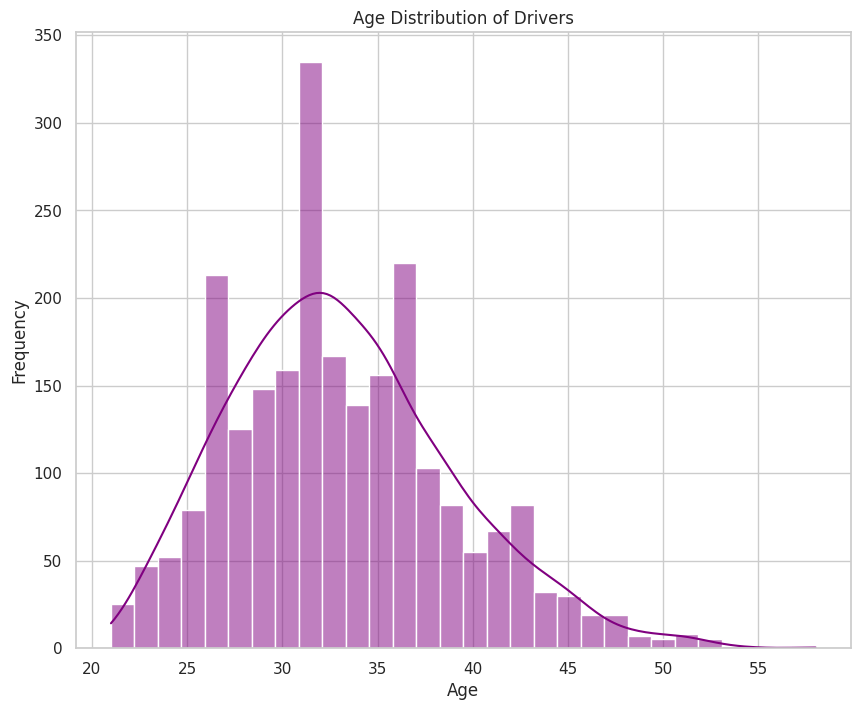

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['Age'], bins=30, kde=True, color='purple')
plt.title("Age Distribution of Drivers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


## **Gender Distribution of Drivers**

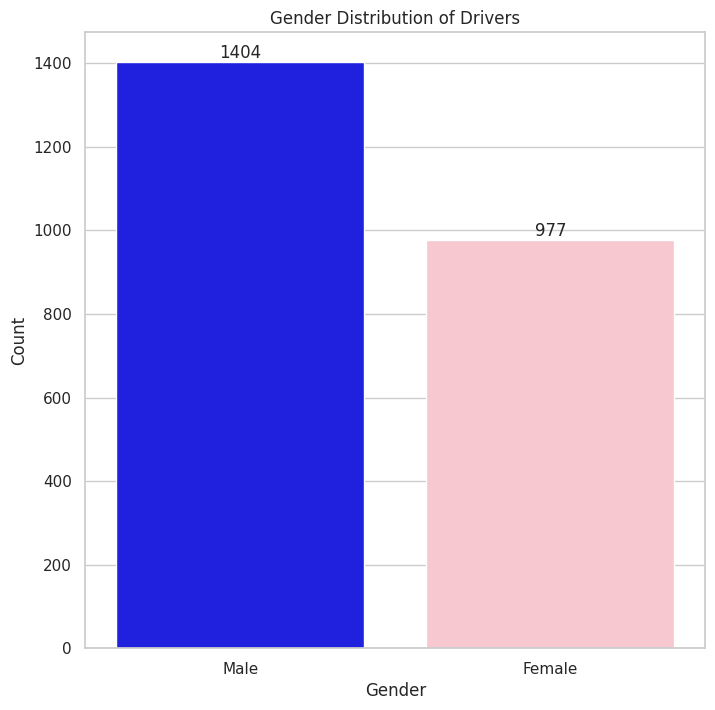

In [ ]:
plt.figure(figsize=(8, 8))
ax = sns.countplot(x="Gender", data=df, palette=["blue","pink"])
for i in ax.containers:
  ax.bar_label(i)
plt.title("Gender Distribution of Drivers")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([0, 1], ["Male", "Female"])
plt.show()


## **Income vs. Education Level**

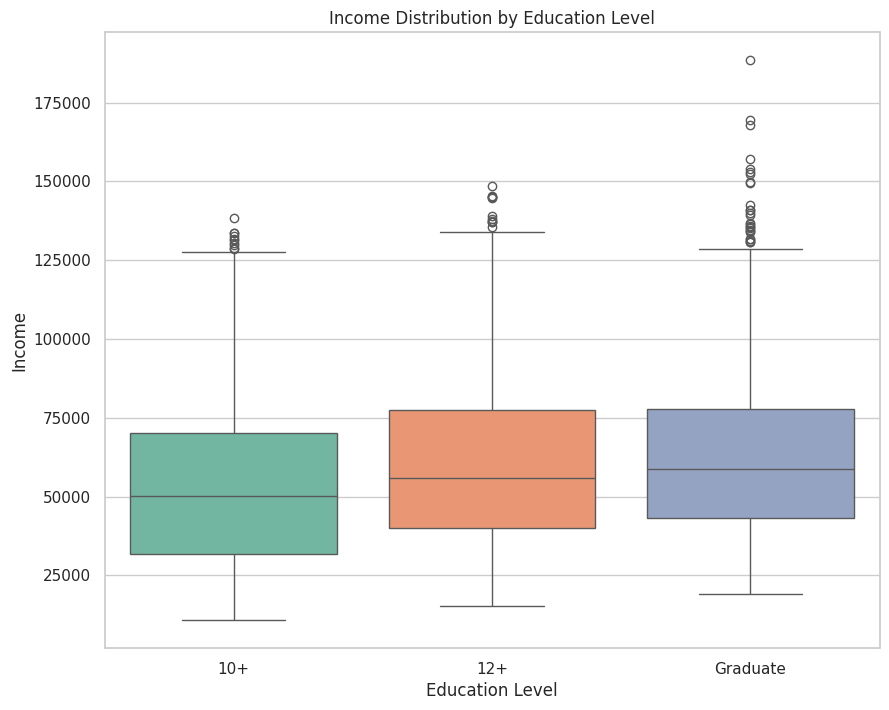

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Education_Level", y="Income", data=df, palette="Set2")
plt.title("Income Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Income")
plt.xticks([0, 1, 2], ["10+", "12+", "Graduate"])
plt.show()


## **Business Value by City**

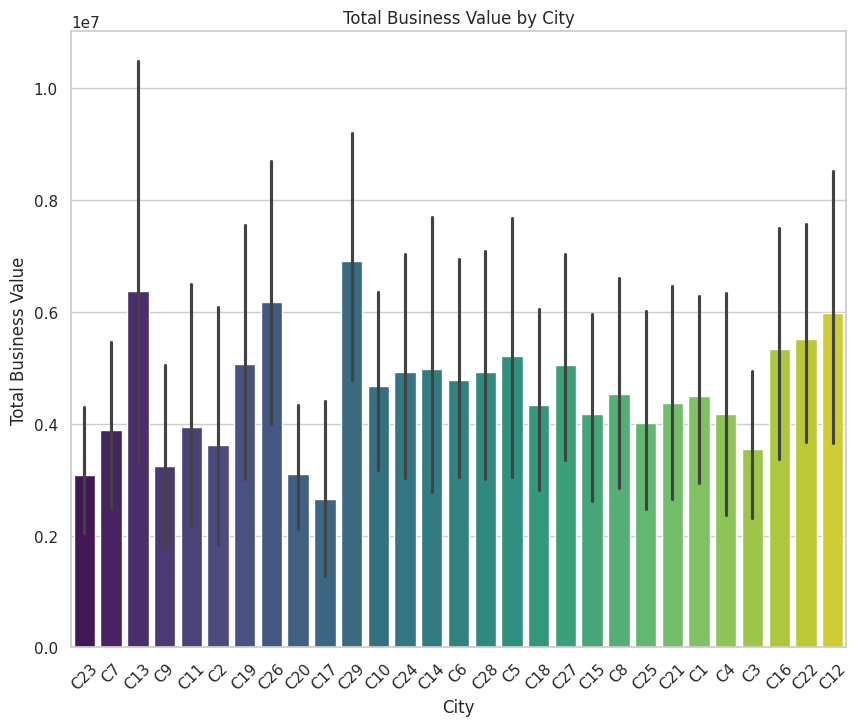

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="City", y="Total Business Value", data=df, palette="viridis")
plt.title("Total Business Value by City")
plt.xlabel("City")
plt.ylabel("Total Business Value")
plt.xticks(rotation = 45)
plt.show()


## **Driver Churn - Left vs. Still_Working**

In [ ]:
df["Target"].value_counts()

,count
Target,
1,1616
0,765


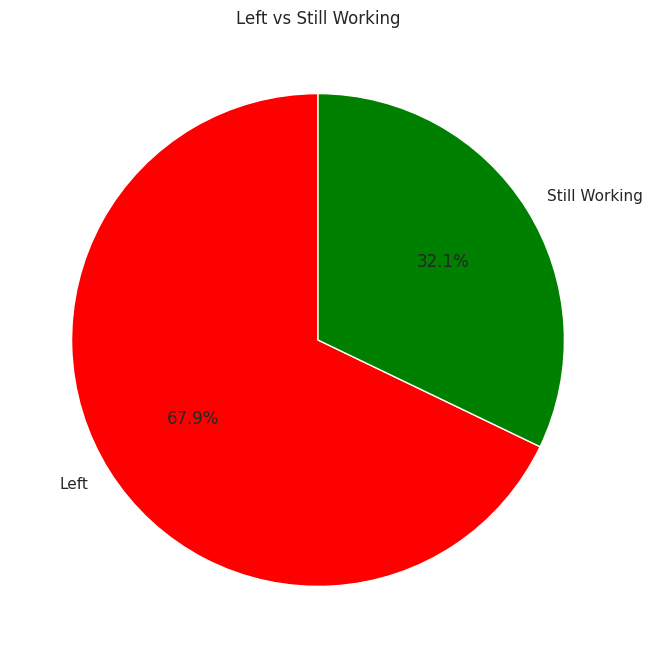

In [ ]:
# Plotting pie chart
left_counts = df["Target"].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(left_counts, labels=["Left","Still Working"], autopct="%1.1f%%", colors=["Red", "Green"],startangle=90)
plt.title("Left vs Still Working")
plt.show()


## **Quarterly Rating vs. Business Value**

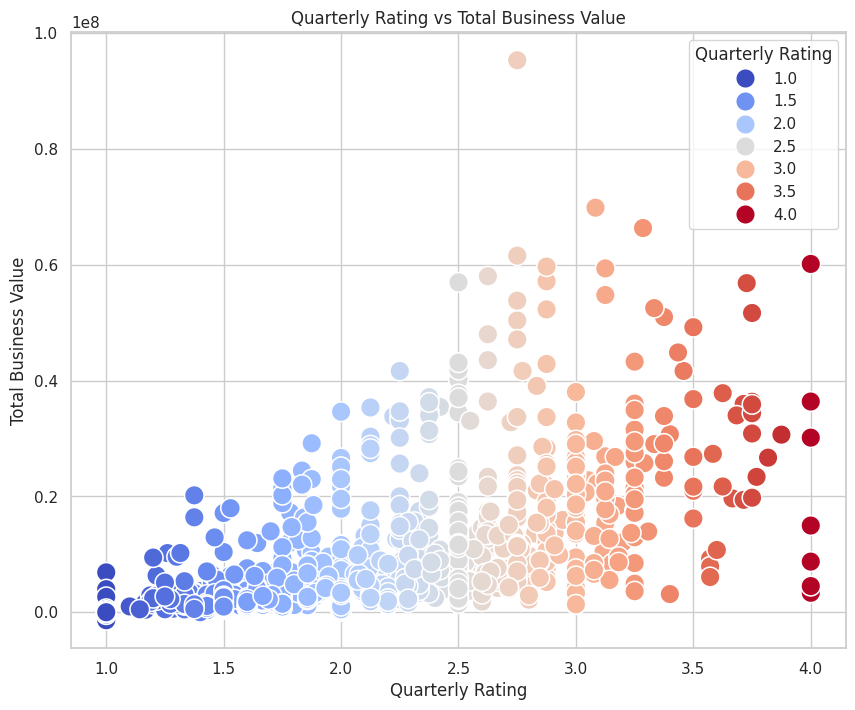

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="Quarterly Rating", y="Total Business Value", data=df, hue="Quarterly Rating", palette="coolwarm", s=200)
plt.title("Quarterly Rating vs Total Business Value")
plt.xlabel("Quarterly Rating")
plt.ylabel("Total Business Value")
plt.show()


## **Income vs. Driver Grade**

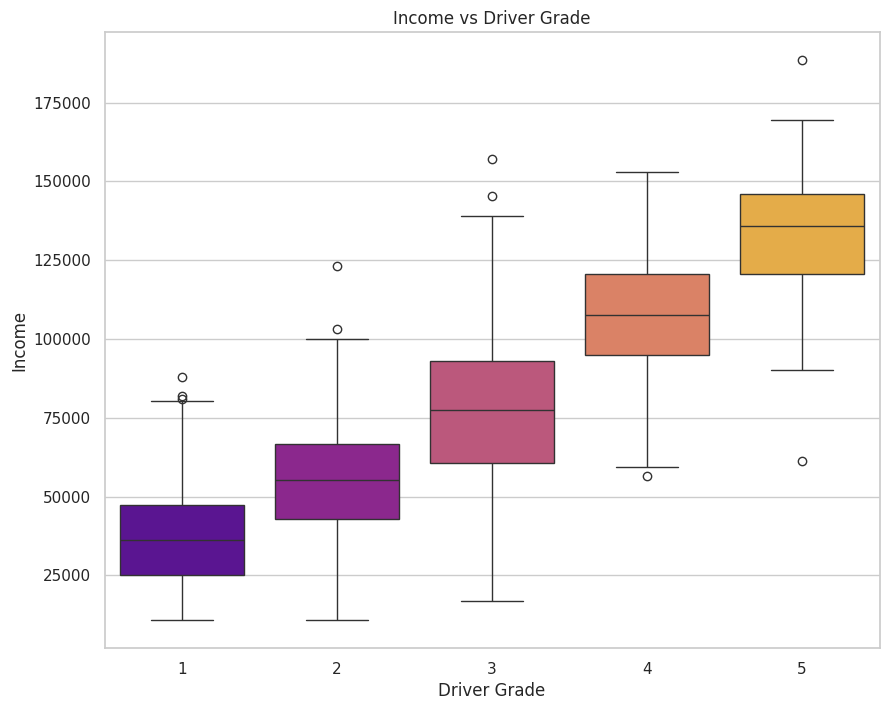

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="Grade", y="Income", data=df, palette="plasma")
plt.title("Income vs Driver Grade")
plt.xlabel("Driver Grade")
plt.ylabel("Income")
plt.show()


## **Income vs. City**

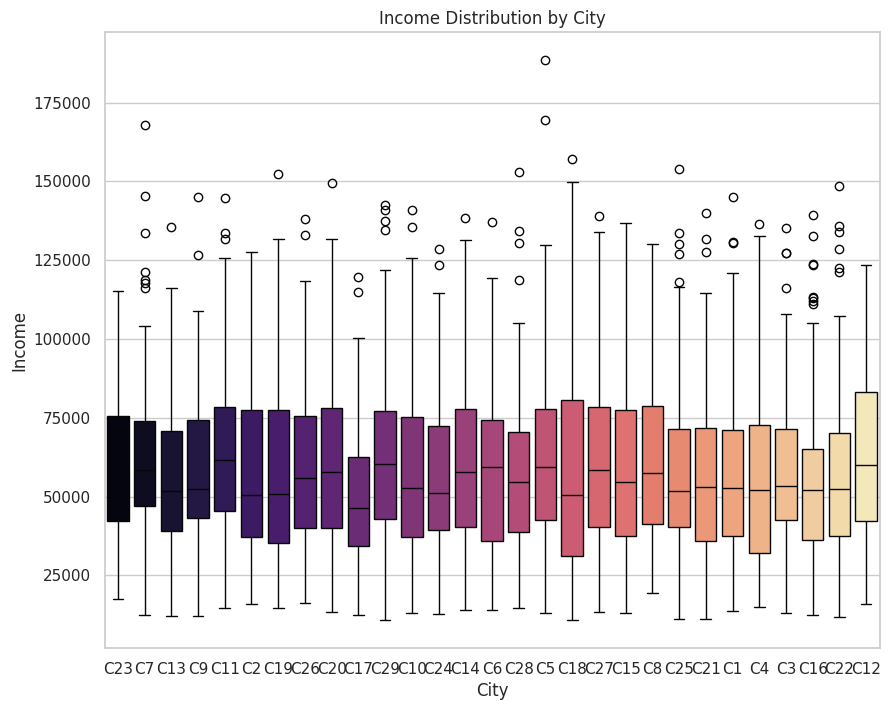

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="City", y="Income", data=df, palette="magma")
plt.title("Income Distribution by City")
plt.xlabel("City")
plt.ylabel("Income")
plt.show()


## **HeatMap**

In [ ]:
df.select_dtypes(include = np.number).columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating', 'Quarterly_Rating_Increased', 'Target',
       'Income_Increased'],
      dtype='object')

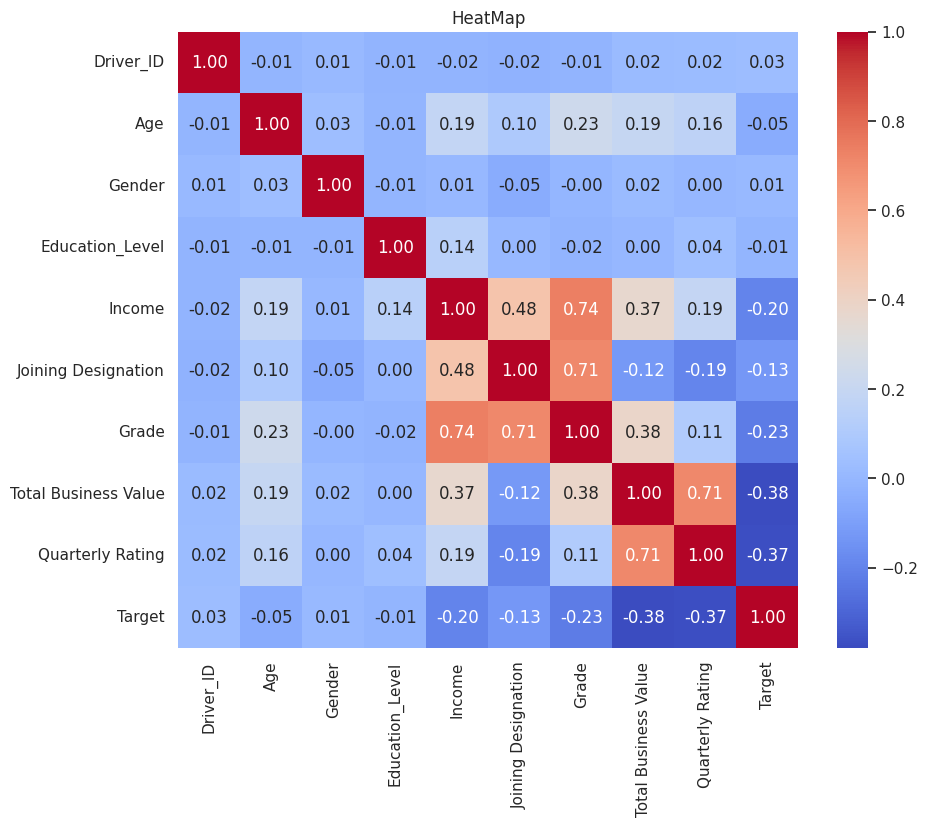

In [ ]:
# Check Correlation

selected_columns = df[["Driver_ID","Age","Gender","Education_Level","Income","Joining Designation","Grade","Total Business Value","Quarterly Rating","Target"]]

plt.figure(figsize=(10,8))
# Plot the heatmap
sns.heatmap(selected_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("HeatMap")
plt.show()

## <font color = "yellow">**Lets train the model**</font>

In [ ]:
df.select_dtypes(include = "object").columns

Index(['City'], dtype='object')

In [ ]:
!pip install category_encoders


In [ ]:
import category_encoders as ce
encoder = ce.TargetEncoder(cols=['City'])
df["City"] = encoder.fit_transform(df['City'], df['Target'])


In [ ]:
df.head()

,Driver_ID,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,Joining Designation,Grade,Total Business Value,Quarterly Rating,Quarterly_Rating_Increased,Target,Income_Increased
0,1,2019-01-01,28.0,0.0,0.769859,2,57387.0,2018-12-24,1,1,1715580,2.0,0,1,0
1,2,2020-01-11,31.0,0.0,0.684190,2,67016.0,2020-06-11,2,2,0,1.0,0,0,0
2,4,2019-01-12,43.0,0.0,0.816064,2,65603.0,2019-07-12,2,2,350000,1.0,0,1,0
3,5,2019-01-01,29.0,0.0,0.706553,0,46368.0,2019-09-01,1,1,120360,1.0,0,1,0
4,6,2020-01-08,31.0,1.0,0.702829,1,78728.0,2020-07-31,3,3,1265000,1.6,0,0,0


## **Check for Imbalance Data**

In [ ]:
df["Target"].value_counts()/df.shape[0]*100

,count
Target,
1,67.870643
0,32.129357



### **Since the data is not highly imbalanced (i.e., no class represents more than 90-95% of the total), we do not apply data imputation.**
### **Also models like Random Forest and XGBoost are generally robust to this level of imbalance and can perform well without the need for resampling.**

## **Model Building**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assigning Feature and Target Variable
X = df.drop(columns = ["Target","MMM-YY","Dateofjoining"])
y = df["Target"]

In [ ]:
# Split the data into train and test and then train and validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (1904, 12)
Shape of X_test: (477, 12)
Shape of y_train: (1904,)
Shape of y_test: (477,)


In [ ]:
# Standadize the data and fit the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## <font color = orange>1. **Decision Tree**</font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
model.score(X_test, y_test)

0.70020964360587

In [ ]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score

kfold = KFold(n_splits=10)

depths = [3, 4, 5, 6, 7, 9, 11, 13, 15, 50]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv = kfold, scoring = "accuracy", return_train_score = True)


    # Print the results for train and validation accuracy
    print(f"K-Fold for depth: {depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100:.2f} Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100:.2f} Validation: {cv_acc_results['test_score'].std()*100:.2f}")
    print('***************')

K-Fold for depth: 3 Accuracy Mean: Train: 77.89 Validation: 76.83
K-Fold for depth: 3 Accuracy Std: Train: 0.49 Validation: 4.12
***************
K-Fold for depth: 4 Accuracy Mean: Train: 78.33 Validation: 76.78
K-Fold for depth: 4 Accuracy Std: Train: 0.50 Validation: 3.84
***************
K-Fold for depth: 5 Accuracy Mean: Train: 79.38 Validation: 76.20
K-Fold for depth: 5 Accuracy Std: Train: 0.72 Validation: 5.01
***************
K-Fold for depth: 6 Accuracy Mean: Train: 80.86 Validation: 75.73
K-Fold for depth: 6 Accuracy Std: Train: 0.69 Validation: 3.91
***************
K-Fold for depth: 7 Accuracy Mean: Train: 82.31 Validation: 75.47
K-Fold for depth: 7 Accuracy Std: Train: 0.52 Validation: 4.40
***************
K-Fold for depth: 9 Accuracy Mean: Train: 86.18 Validation: 73.58
K-Fold for depth: 9 Accuracy Std: Train: 0.72 Validation: 3.71
***************
K-Fold for depth: 11 Accuracy Mean: Train: 90.60 Validation: 72.21
K-Fold for depth: 11 Accuracy Std: Train: 0.92 Validation: 2.76

In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10)

depths = [3, 4, 5, 6, 7, 9, 11, 13, 15, 50]

# Display the header
print(f'{"K-Fold Depth":<15} | {"Train Accuracy":<15} | {"Test Accuracy":<15} | {"Train Accuracy Std":<20} | {"Test Accuracy Std"}')
print('-'*100)

# Loop through depths and calculate accuracy
for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, X_train, y_train, cv=kfold, scoring="accuracy", return_train_score=True)

    # Print results in the desired format
    print(f'{depth:<15} | {cv_acc_results["train_score"].mean()*100:<14.2f}%  | {cv_acc_results["test_score"].mean()*100:<14.2f}%  | {cv_acc_results["train_score"].std()*100:<18.2f}% | {cv_acc_results["test_score"].std()*100:<15.2f}%')


K-Fold Depth    | Train Accuracy  | Test Accuracy   | Train Accuracy Std   | Test Accuracy Std
----------------------------------------------------------------------------------------------------
3               | 77.89         %  | 76.83         %  | 0.49              % | 4.12           %
4               | 78.33         %  | 76.78         %  | 0.50              % | 3.84           %
5               | 79.38         %  | 76.20         %  | 0.72              % | 5.01           %
6               | 80.86         %  | 75.73         %  | 0.69              % | 3.91           %
7               | 82.31         %  | 75.47         %  | 0.52              % | 4.40           %
9               | 86.18         %  | 73.58         %  | 0.72              % | 3.71           %
11              | 90.60         %  | 72.21         %  | 0.92              % | 2.76           %
13              | 94.50         %  | 69.85         %  | 1.01              % | 2.47           %
15              | 97.35         %  | 69.11  

In [ ]:
model = DecisionTreeClassifier(criterion="gini",max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
model.score(X_test, y_test)

0.7714884696016772

In [ ]:
pred = model.predict(X_test)

In [ ]:
print(f"Training Score: {model.score(X_train, y_train)}")
print(f"Test Score: {model.score(X_test, y_test)}")

Training Score: 0.779936974789916
Test Score: 0.7714884696016772


##<font color = orange> **Access Feature Importance of Decision Tree**

In [ ]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to map features to their importance
coef_map = pd.DataFrame({
    "Features": X.columns,
    "Feature Importance": feature_importances
})

# Sort the features by importance
coef_map = coef_map.sort_values(by="Feature Importance", ascending=False).reset_index(drop=True)

# Display feature importance in the desired format
print(f'{"Feature":<35} | Feature Importance')
print('------'*10)
for index, row in coef_map.iterrows():
    print(f'\033[1m{row["Features"]:<35}\033[0m |   {row["Feature Importance"]:.4f}')


Feature                             | Feature Importance
------------------------------------------------------------
Total Business Value                |   0.6668
Quarterly Rating                    |   0.1727
Joining Designation                 |   0.1605
Driver_ID                           |   0.0000
Age                                 |   0.0000
Gender                              |   0.0000
City                                |   0.0000
Education_Level                     |   0.0000
Income                              |   0.0000
Grade                               |   0.0000
Quarterly_Rating_Increased          |   0.0000
Income_Increased                    |   0.0000


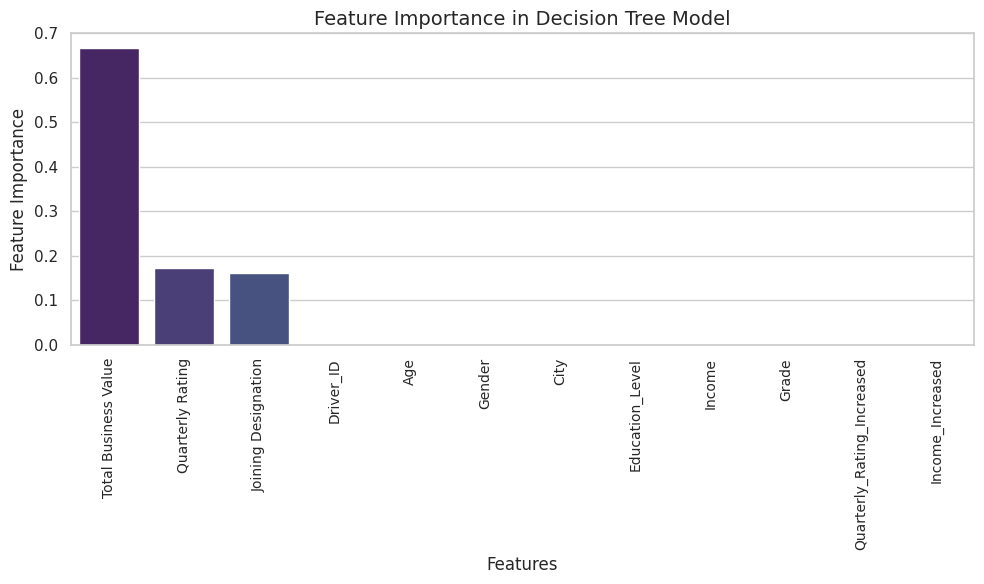

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a style for the plot (e.g., clean, whitegrid)
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size for better readability
ax = sns.barplot(x=coef_map["Features"], y=coef_map["Feature Importance"], palette='viridis')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=10)

# Add labels and title
plt.xlabel('Features', fontsize=12)
plt.ylabel('Feature Importance', fontsize=12)
plt.title('Feature Importance in Decision Tree Model', fontsize=14)

# Show the plot with proper layout
plt.tight_layout()
plt.show()


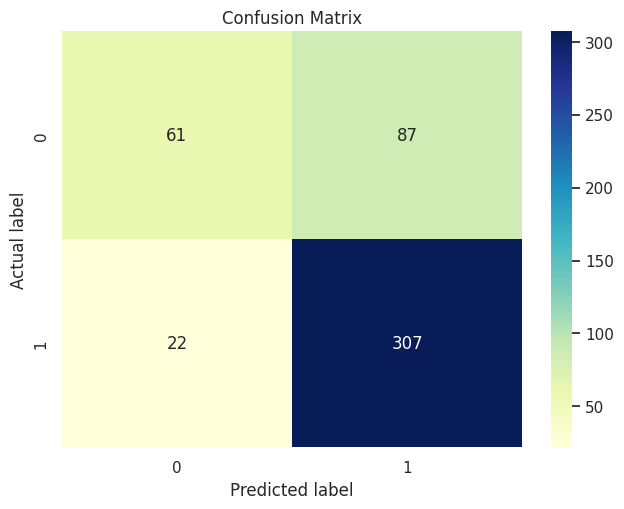

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

#### create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

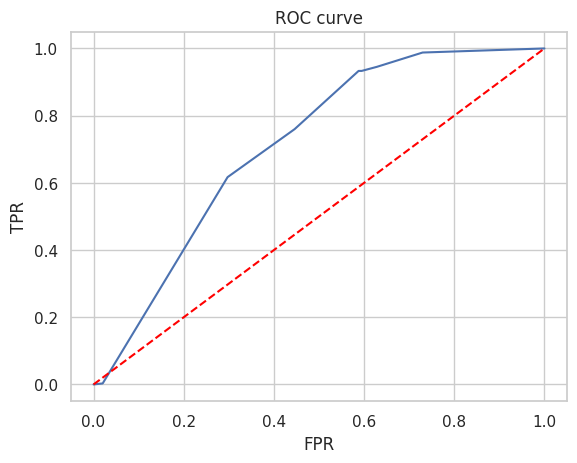

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
prob = model.predict_proba(X_test)
probabilites = prob[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Training
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Test
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Displaying Training Set Performance
print(f'{"Training Set Performance":<30}')
print('------'*10)
print(f'{"Accuracy":<25} | {train_accuracy:.4f}')
print(f'{"Precision":<25} | {train_precision:.4f}')
print(f'{"Recall":<25} | {train_recall:.4f}')
print(f'{"F1 Score":<25} | {train_f1:.4f}')
print('------'*10)

# Displaying Test Set Performance
print(f'{"Test Set Performance":<30}')
print('------'*10)
print(f'{"Accuracy":<25} | {test_accuracy:.4f}')
print(f'{"Precision":<25} | {test_precision:.4f}')
print(f'{"Recall":<25} | {test_recall:.4f}')
print(f'{"F1 Score":<25} | {test_f1:.4f}')


Training Set Performance      
------------------------------------------------------------
Accuracy                  | 0.7799
Precision                 | 0.7789
Recall                    | 0.9417
F1 Score                  | 0.8526
------------------------------------------------------------
Test Set Performance          
------------------------------------------------------------
Accuracy                  | 0.7715
Precision                 | 0.7792
Recall                    | 0.9331
F1 Score                  | 0.8492


## <font color = orange>**2.Bagging using Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=18, max_depth=5, n_estimators=101)

In [ ]:
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")


K-Fold Accuracy Mean: 
 Train: 79.06 
 Validation: 76.57
K-Fold Accuracy Std: 
 Train: 0.48, 
 Validation: 4.56


In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier

kfold = KFold(n_splits=10)

# Assuming rf_clf is defined earlier in your code, e.g.:
# rf_clf = RandomForestClassifier(random_state=7)

# Display the header
print(f'{"K-Fold Depth":<15} | {"Train Accuracy":<15} | {"Test Accuracy":<15} | {"Train Accuracy Std":<20} | {"Test Accuracy Std"}')
print('-'*85)

# Perform cross-validation
cv_acc_results = cross_validate(rf_clf, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

# Print the results in the desired format
print(f'{"N/A":<15} | {cv_acc_results["train_score"].mean()*100:<14.2f}%  | {cv_acc_results["test_score"].mean()*100:<14.2f}%  | {cv_acc_results["train_score"].std()*100:<18.2f}% | {cv_acc_results["test_score"].std()*100:<15.2f}%')


K-Fold Depth    | Train Accuracy  | Test Accuracy   | Train Accuracy Std   | Test Accuracy Std
-------------------------------------------------------------------------------------
N/A             | 79.06         %  | 76.57         %  | 0.48              % | 4.56           %


In [ ]:
rf_clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=101, random_state=18)

In [ ]:
print("Train accuracy: {:.2f}".format(rf_clf.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(rf_clf.score(X_test, y_test)*100))

Train accuracy: 78.78
Test accuracy: 77.78


## <font color = orange>**Hyperparameter Tunning**

In [ ]:
# Defining parameters -

params = {
          "n_estimators" : [100,200,300,400,500],
          "max_depth" : [3,5,7,10],
          "criterion" : ["gini", "entropy"],
          "bootstrap" : [True, False],
          "max_features" : [5,8,9,10,12]
         }

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = "accuracy",
                    cv = 3,
                    n_jobs=-1
                    )

grid.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': [5, 8, 9, 10, 12],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [ ]:
print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 12, 'n_estimators': 400}
Best score:  0.7699595121587719


In [ ]:
clf2 = RandomForestClassifier(random_state=7, bootstrap=True, criterion="gini",
                              max_depth=3, max_features=12, n_estimators=200)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(clf2, X_train, y_train, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.3f} \n Validation: {cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.3f}, \n Validation: {cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train: 77.801 
 Validation: 77.045
K-Fold Accuracy Std: 
 Train: 0.504, 
 Validation: 4.261


In [ ]:
clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=12, n_estimators=200,
                       random_state=7)

In [ ]:
print("Train accuracy: {:.2f}".format(clf2.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(clf2.score(X_test, y_test)*100))

Train accuracy: 77.84
Test accuracy: 77.99


##<font color = orange> **Access Feature Importance of Random Forest**

In [ ]:
importances = clf2.feature_importances_

# Create a DataFrame to show feature importance
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False).reset_index(drop=True)

# Display feature importance in the desired format
print(f'{"Feature":<35} | Importance')
print('------'*10)
for index, row in feature_importance_df.iterrows():
    print(f'\033[1m{row["Feature"]:<35}\033[0m |   ', f'{row["Importance"]:.4f}')


Feature                             | Importance
------------------------------------------------------------
Total Business Value                |    0.6315
Quarterly Rating                    |    0.1664
Joining Designation                 |    0.1664
City                                |    0.0127
Age                                 |    0.0114
Driver_ID                           |    0.0044
Grade                               |    0.0030
Income                              |    0.0024
Gender                              |    0.0015
Education_Level                     |    0.0004
Quarterly_Rating_Increased          |    0.0000
Income_Increased                    |    0.0000


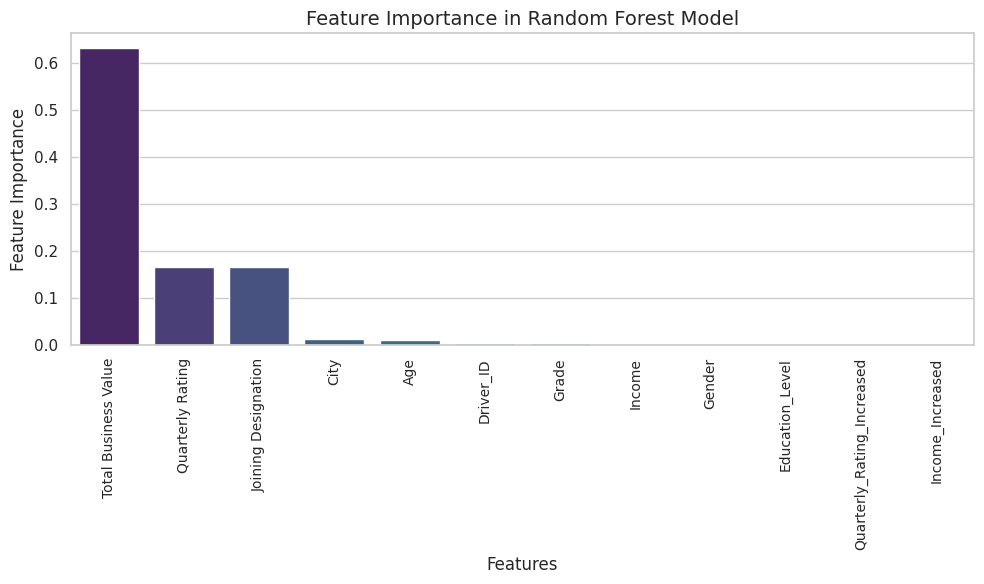

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a style for the plot (e.g., clean, whitegrid)
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size for better readability
ax = sns.barplot(x=feature_importance_df["Feature"], y=feature_importance_df["Importance"], palette="viridis")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=10)

# Add labels and title
plt.xlabel("Features", fontsize=12)
plt.ylabel("Feature Importance", fontsize=12)
plt.title("Feature Importance in Random Forest Model", fontsize=14)

# Show the plot with proper layout
plt.tight_layout()
plt.show()


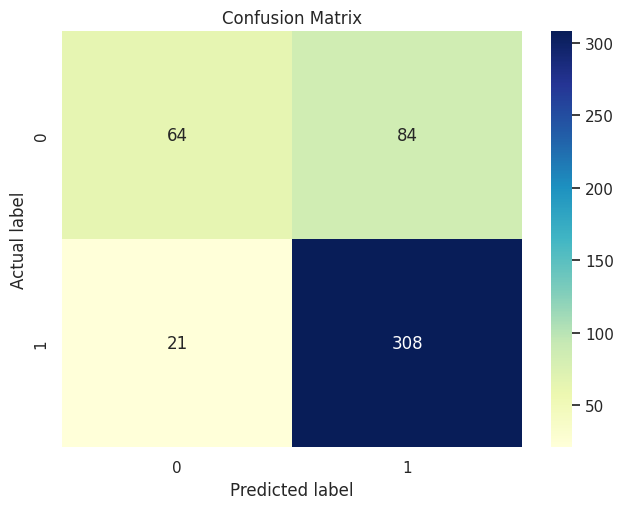

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, clf2.predict(X_test))
fig, ax = plt.subplots()

#### create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

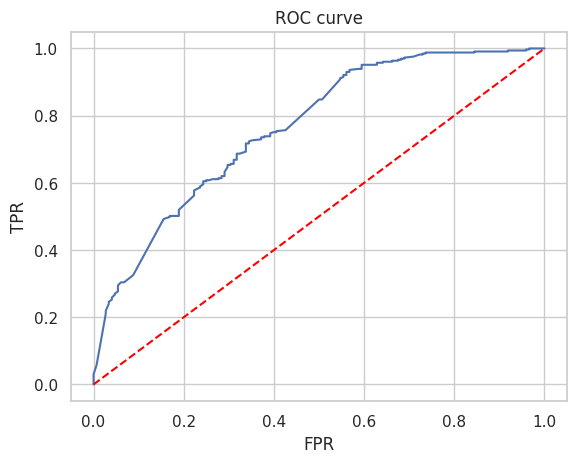

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
prob = clf2.predict_proba(X_test)
probabilites = prob[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Training
y_train_pred = clf2.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Test
y_test_pred = clf2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Displaying Training Set Performance
print(f'{"Training Set Performance":<30}')
print('------'*10)
print(f'{"Accuracy":<25} | {train_accuracy:.4f}')
print(f'{"Precision":<25} | {train_precision:.4f}')
print(f'{"Recall":<25} | {train_recall:.4f}')
print(f'{"F1 Score":<25} | {train_f1:.4f}')
print('------'*10)

# Displaying Test Set Performance
print(f'{"Test Set Performance":<30}')
print('------'*10)
print(f'{"Accuracy":<25} | {test_accuracy:.4f}')
print(f'{"Precision":<25} | {test_precision:.4f}')
print(f'{"Recall":<25} | {test_recall:.4f}')
print(f'{"F1 Score":<25} | {test_f1:.4f}')


Training Set Performance      
------------------------------------------------------------
Accuracy                  | 0.7784
Precision                 | 0.7792
Recall                    | 0.9378
F1 Score                  | 0.8512
------------------------------------------------------------
Test Set Performance          
------------------------------------------------------------
Accuracy                  | 0.7799
Precision                 | 0.7857
Recall                    | 0.9362
F1 Score                  | 0.8544


## <font color = orange>3.**Gradient Boosting Classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbc = GradientBoostingClassifier(random_state=10)
gbc.fit(X_train, y_train)


GradientBoostingClassifier(random_state=10)

In [ ]:
gbc_pred = gbc.predict(X_test)
print("Train accuracy: {:.2f}".format(gbc.score(X_train, y_train)*100))
print("Train accuracy: {:.2f}".format(gbc.score(X_test, y_test)*100))


Train accuracy: 82.25
Train accuracy: 76.94


In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import GradientBoostingClassifier

kfold = KFold(n_splits=10)

depths = [3, 4, 5, 6, 7, 9, 11, 13, 15, 50]

# Display the header
print(f'{"K-Fold Depth":<15} | {"Train Accuracy":<15} | {"Test Accuracy"}')
print('-'*55)

# Loop through depths and calculate accuracy
for depth in depths:
    gbc = GradientBoostingClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(gbc, X_train, y_train, cv=kfold, scoring="accuracy", return_train_score=True)

    # Print results in the desired format
    print(f'{depth:<15} | {cv_acc_results["train_score"].mean()*100:.2f}%  | {cv_acc_results["test_score"].mean()*100:.2f}%')


K-Fold Depth    | Train Accuracy  | Test Accuracy
-------------------------------------------------------
3               | 82.78%  | 76.57%
4               | 87.19%  | 75.68%
5               | 92.03%  | 75.47%
6               | 96.66%  | 74.94%
7               | 99.28%  | 74.42%
9               | 100.00%  | 74.36%
11              | 100.00%  | 74.68%
13              | 100.00%  | 73.68%
15              | 100.00%  | 71.21%
50              | 100.00%  | 69.64%


## <font color = orange>**Hyperparameter Tunning**

In [ ]:
# # Defining parameters -

# params = {
#           "n_estimators" : [50,100,150,200,500,1000],
#           "max_depth" : [3,5,7,10],
#           "learning_rate" : [0.01, 0.1, 0.2, 0.5, 1.0],
#           "min_samples_split" : [2, 5, 10, 20],
#           "min_samples_leaf" : [1, 2, 5],
#           "subsample" : [0.5, 0.7, 0.8, 0.9, 1.0],
#           "max_features" : ['sqrt', 'log2', 0.5, 0.8]
#          }

# from sklearn.model_selection import GridSearchCV

# grid = GridSearchCV(estimator = GradientBoostingClassifier(),
#                     param_grid = params,
#                     scoring = "accuracy",
#                     cv = 5,
#                     n_jobs=-1
#                     )

# grid.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# Defining parameters
params = {
    "n_estimators" : [50, 100, 150, 200, 500, 1000],
    "max_depth" : [3, 5, 7, 10],
    "learning_rate" : [0.01, 0.1, 0.2, 0.5, 1.0],
    "min_samples_split" : [2, 5, 10, 20],
    "min_samples_leaf" : [1, 2, 5],
    "subsample" : [0.5, 0.7, 0.8, 0.9, 1.0],
    "max_features" : ['sqrt', 'log2', 0.5, 0.8]
}

# Setting up RandomizedSearchCV for GradientBoostingClassifier
random_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(),
    param_distributions=params,
    n_iter=200,  # Number of random combinations to try
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fitting the random search on the training data
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.5,
                                                          1.0],
                                        'max_depth': [3, 5, 7, 10],
                                        'max_features': ['sqrt', 'log2', 0.5,
                                                         0.8],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [50, 100, 150, 200, 500,
                                                         1000],
                                        'subsample': [0.5, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
print("Best params: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Best params:  {'subsample': 0.7, 'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 3, 'learning_rate': 0.01}
Best score:  0.7710167150158861


In [ ]:
gbc2 = GradientBoostingClassifier(random_state = 7,
                                  subsample= 0.8,
                                  n_estimators= 200,
                                  min_samples_split= 20,
                                  min_samples_leaf= 2,
                                  max_features= 0.8,
                                  max_depth= 5,
                                  learning_rate= 0.01)
gbc2.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features=0.8,
                           min_samples_leaf=2, min_samples_split=20,
                           n_estimators=200, random_state=7, subsample=0.8)

In [ ]:
print("Train accuracy: {:.2f}".format(gbc2.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(gbc2.score(X_test, y_test)*100))

Train accuracy: 82.09
Test accuracy: 77.78


## <font color = orange>**Access Importatnt Features of Gradient Boosting Classifier**

In [ ]:
# Get feature importances
feature_importances = gbc2.feature_importances_

# Create a DataFrame to map features to their importance
coef_map = pd.DataFrame({
    "Features": X.columns,
    "Feature Importance": feature_importances
})

# Sort the features by importance
coef_map = coef_map.sort_values(by="Feature Importance", ascending=False).reset_index(drop=True)

# Display feature importance in the desired format
print(f'{"Feature":<35} | Feature Importance')
print('------'*10)
for index, row in coef_map.iterrows():
    print(f'\033[1m{row["Features"]:<35}\033[0m |   {row["Feature Importance"]:.4f}')


Feature                             | Feature Importance
------------------------------------------------------------
Total Business Value                |   0.4251
Quarterly Rating                    |   0.1822
Joining Designation                 |   0.1169
Income                              |   0.0657
City                                |   0.0561
Age                                 |   0.0542
Driver_ID                           |   0.0516
Grade                               |   0.0329
Education_Level                     |   0.0080
Gender                              |   0.0073
Quarterly_Rating_Increased          |   0.0000
Income_Increased                    |   0.0000


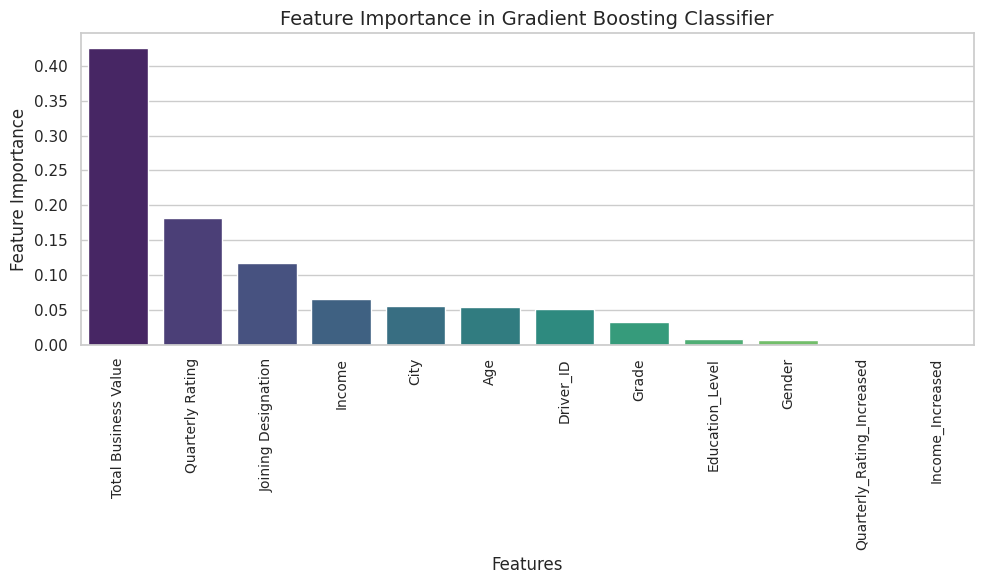

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a style for the plot (e.g., clean, whitegrid)
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size for better readability
ax = sns.barplot(x=coef_map["Features"], y=coef_map["Feature Importance"], palette="viridis")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=10)

# Add labels and title
plt.xlabel("Features", fontsize=12)
plt.ylabel("Feature Importance", fontsize=12)
plt.title("Feature Importance in Gradient Boosting Classifier", fontsize=14)

# Show the plot with proper layout
plt.tight_layout()
plt.show()


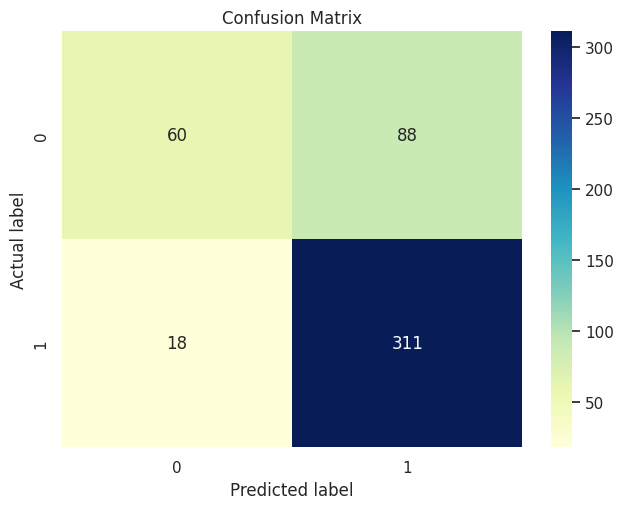

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, gbc2.predict(X_test))
fig, ax = plt.subplots()

#### create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

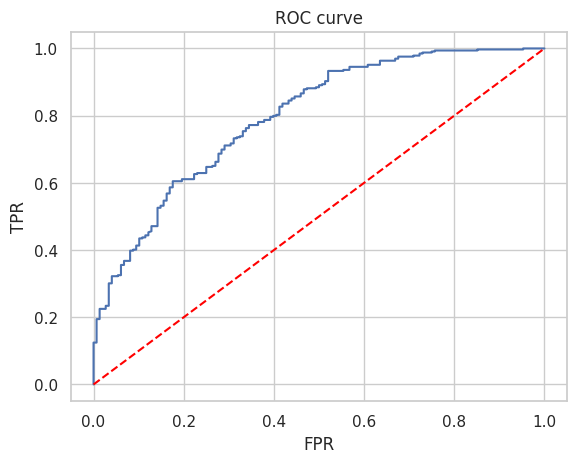

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
prob = gbc2.predict_proba(X_test)
probabilites = prob[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Training
y_train_pred = gbc2.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Test
y_test_pred = gbc2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Displaying Training Set Performance
print(f'{"Training Set Performance":<30}')
print('------'*10)
print(f'{"Accuracy":<25} | {train_accuracy:.4f}')
print(f'{"Precision":<25} | {train_precision:.4f}')
print(f'{"Recall":<25} | {train_recall:.4f}')
print(f'{"F1 Score":<25} | {train_f1:.4f}')
print('------'*10)

# Displaying Test Set Performance
print(f'{"Test Set Performance":<30}')
print('------'*10)
print(f'{"Accuracy":<25} | {test_accuracy:.4f}')
print(f'{"Precision":<25} | {test_precision:.4f}')
print(f'{"Recall":<25} | {test_recall:.4f}')
print(f'{"F1 Score":<25} | {test_f1:.4f}')


Training Set Performance      
------------------------------------------------------------
Accuracy                  | 0.8209
Precision                 | 0.8024
Recall                    | 0.9751
F1 Score                  | 0.8804
------------------------------------------------------------
Test Set Performance          
------------------------------------------------------------
Accuracy                  | 0.7778
Precision                 | 0.7794
Recall                    | 0.9453
F1 Score                  | 0.8544


## <font color = orange>4.**XGBoost**

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# import xgboost as xgb

# # Defining parameters for XGBoost
# params = {
#     "n_estimators": [50, 100, 150, 200, 500, 1000],
#     "max_depth": [3, 5, 7],
#     "learning_rate": [0.01, 0.1, 0.2, 1.0],
#     "min_child_weight": [1, 3, 5],  # XGBoost equivalent of min_samples_split and min_samples_leaf
#     "subsample": [0.5, 0.7, 0.8, 1.0],
#     "gamma": [0, 0.1, 0.2, 0.5],  # Regularization
# }

# # Setting up RandomizedSearchCV for XGBoost
# random_search = RandomizedSearchCV(
#     estimator=xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),  # Ensure compatibility
#     param_distributions=params,
#     scoring="accuracy",
#     cv=5,
#     n_jobs=-1,
#     n_iter=100,  # Number of random combinations to try
#     random_state=42
# )

# random_search.fit(X_train, y_train)


### <Font Color = blue >**Since my machine doesn't support XGBoost, let's use HistGradientBoostingClassifier, which is a similar alternative to XGBoost.**</font>

## <font color = orange>5.**Hist Gradient Boosting Classifier**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier

# Defining parameters for HistGradientBoostingClassifier
params = {
    "max_iter": [50, 100, 150, 200, 500],  # Number of boosting iterations (equivalent to n_estimators in XGBoost)
    "max_depth": [3, 5, 7],  # Depth of the trees
    "learning_rate": [0.01, 0.1, 0.2, 0.5],  # Learning rate
    "min_samples_leaf": [1, 3, 5],  # Minimum samples per leaf (similar to min_child_weight in XGBoost)
    "max_bins": [255, 500, 1000],  # Max number of bins to split continuous features
    "l2_regularization": [0, 0.1, 0.5],  # L2 regularization (similar to gamma in XGBoost)
}

# Setting up RandomizedSearchCV for HistGradientBoostingClassifier
random_search = RandomizedSearchCV(
    estimator=HistGradientBoostingClassifier(),  # Using HistGradientBoostingClassifier
    param_distributions=params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    n_iter=100,  # Number of random combinations to try
    random_state=42
)

# Fit the model with the training data
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=HistGradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'l2_regularization': [0, 0.1, 0.5],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.5],
                                        'max_bins': [255, 500, 1000],
                                        'max_depth': [3, 5, 7],
                                        'max_iter': [50, 100, 150, 200, 500],
                                        'min_samples_leaf': [1, 3, 5]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Output the best parameters found
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

Best parameters found:  {'min_samples_leaf': 1, 'max_iter': 50, 'max_depth': 3, 'max_bins': 255, 'learning_rate': 0.1, 'l2_regularization': 0}
Best score found:  0.7731233595800525


In [ ]:
pip install -U scikit-learn


In [ ]:
# Fit the model with the best parameters found
hgb = HistGradientBoostingClassifier(min_samples_leaf = 1,
                                     max_iter = 50,
                                     max_depth = 3,
                                     max_bins = 255,
                                     learning_rate = 0.1,
                                     l2_regularization = 0 )

hgb.fit(X_train, y_train)

HistGradientBoostingClassifier(l2_regularization=0, max_depth=3, max_iter=50,
                               min_samples_leaf=1)

In [ ]:
print("Train accuracy: {:.2f}".format(hgb.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(hgb.score(X_test, y_test)*100))


Train accuracy: 80.04
Test accuracy: 77.78


## <font color = orange>**Access Importatnt Features of Hist Boosting Classifier**


### <font color = "Blue">**Since HistGradient Boosting Classifier doesn't have a direct feature importance function, we will access feature importance using permutation_importance.**</font>

In [ ]:
from sklearn.inspection import permutation_importance
# Calculate permutation importance
result = permutation_importance(hgb, X_test, y_test, n_repeats=10, random_state=42)

# Create a DataFrame to map features to their importance
coef_map = pd.DataFrame({
    "Features": X.columns,  # Ensure you are using the correct DataFrame columns
    "Feature Importance": result.importances_mean
})

# Sort the features by importance
coef_map = coef_map.sort_values(by="Feature Importance", ascending=False).reset_index(drop=True)

# Display feature importance in the desired format
print(f'{"Feature":<35} | Feature Importance')
print('------' * 10)
for index, row in coef_map.iterrows():
    print(f'\033[1m{row["Features"]:<35}\033[0m |   {row["Feature Importance"]:.4f}')


Feature                             | Feature Importance
------------------------------------------------------------
Quarterly Rating                    |   0.0822
Total Business Value                |   0.0740
Joining Designation                 |   0.0245
Driver_ID                           |   0.0036
Grade                               |   0.0029
City                                |   0.0023
Gender                              |   0.0019
Age                                 |   0.0008
Education_Level                     |   0.0000
Quarterly_Rating_Increased          |   0.0000
Income_Increased                    |   0.0000
Income                              |   -0.0031


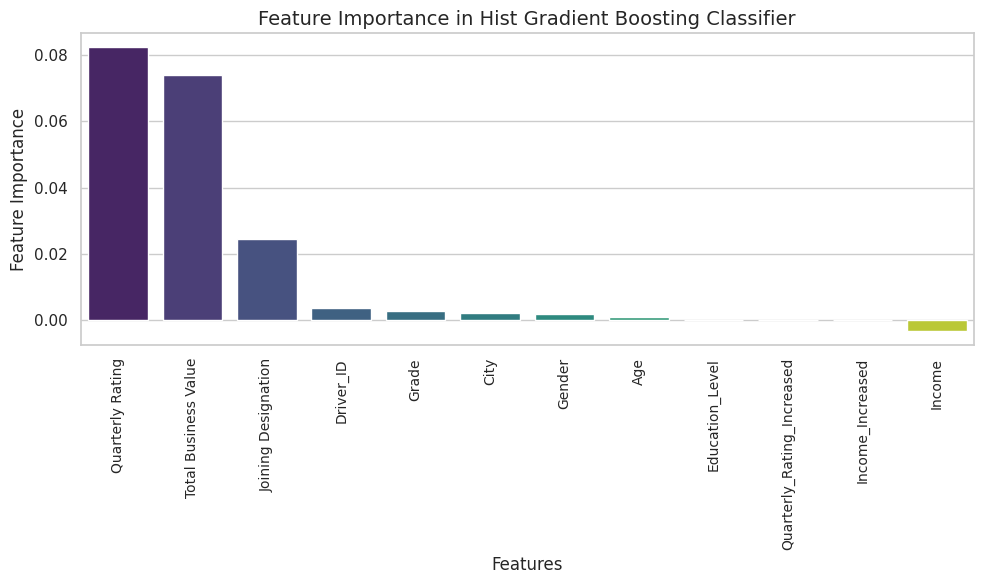

In [ ]:
# Set a style for the plot (e.g., clean, whitegrid)
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size for better readability
ax = sns.barplot(x=coef_map["Features"], y=coef_map["Feature Importance"], palette="viridis")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=10)

# Add labels and title
plt.xlabel("Features", fontsize=12)
plt.ylabel("Feature Importance", fontsize=12)
plt.title("Feature Importance in Hist Gradient Boosting Classifier", fontsize=14)

# Show the plot with proper layout
plt.tight_layout()
plt.show()


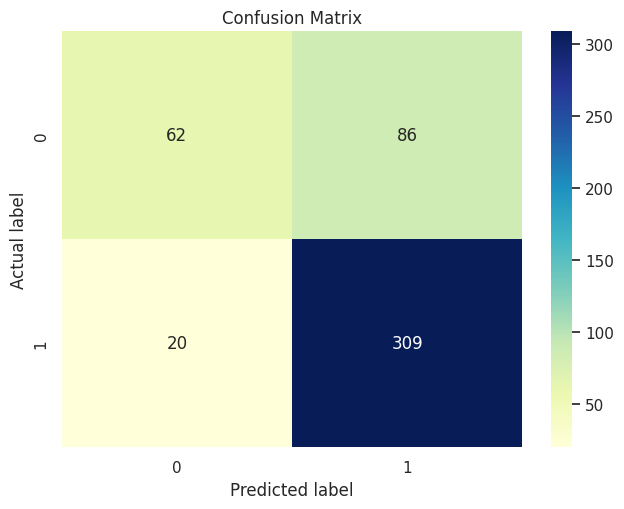

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

cnf_matrix = confusion_matrix(y_test, hgb.predict(X_test))
fig, ax = plt.subplots()

#### create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()



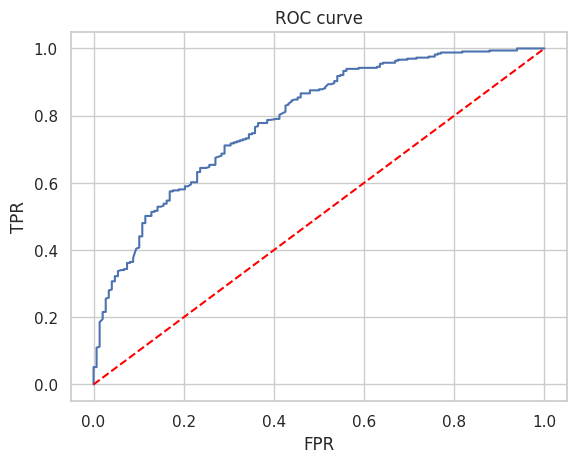

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
prob = hgb.predict_proba(X_test)
probabilites = prob[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Training
y_train_pred = hgb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Test
y_test_pred = hgb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Displaying Training Set Performance
print(f'{"Training Set Performance":<30}')
print('------'*10)
print(f'{"Accuracy":<25} | {train_accuracy:.4f}')
print(f'{"Precision":<25} | {train_precision:.4f}')
print(f'{"Recall":<25} | {train_recall:.4f}')
print(f'{"F1 Score":<25} | {train_f1:.4f}')
print('------'*10)

# Displaying Test Set Performance
print(f'{"Test Set Performance":<30}')
print('------'*10)
print(f'{"Accuracy":<25} | {test_accuracy:.4f}')
print(f'{"Precision":<25} | {test_precision:.4f}')
print(f'{"Recall":<25} | {test_recall:.4f}')
print(f'{"F1 Score":<25} | {test_f1:.4f}')


Training Set Performance      
------------------------------------------------------------
Accuracy                  | 0.8004
Precision                 | 0.7905
Recall                    | 0.9588
F1 Score                  | 0.8666
------------------------------------------------------------
Test Set Performance          
------------------------------------------------------------
Accuracy                  | 0.7778
Precision                 | 0.7823
Recall                    | 0.9392
F1 Score                  | 0.8536


## <font color = orange> 6.**LightGBM**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

# Defining parameters for LightGBM
params = {
    "n_estimators": [50, 100, 150, 200, 500, 1000],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2,1.0],
    "min_child_samples": [10, 20, 30, 50],  # LightGBM's equivalent of min_samples_split
    "subsample": [0.5, 0.7, 0.8, 0.9, 1.0],
    "reg_alpha": [0, 0.1, 0.2, 0.5],  # L1 regularization
    "reg_lambda": [0, 0.1, 0.2, 0.5],  # L2 regularization
}

# Setting up RandomizedSearchCV for LightGBM
random_search2 = RandomizedSearchCV(
    estimator=lgb.LGBMClassifier(),
    param_distributions=params,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    n_iter=100,  # Number of random combinations to try
    random_state=42
)

random_search2.fit(X_train, y_train)




[LightGBM] [Info] Number of positive: 1287, number of negative: 617
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.675945 -> initscore=0.735200
[LightGBM] [Info] Start training from score 0.735200
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 1.0],
                                        'max_depth': [3, 5, 7],
                                        'min_child_samples': [10, 20, 30, 50],
                                        'n_estimators': [50, 100, 150, 200, 500,
                                                         1000],
                                        'reg_alpha': [0, 0.1, 0.2, 0.5],
                                        'reg_lambda': [0, 0.1, 0.2, 0.5],
                                        'subsample': [0.5, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Output the best parameters and score
print("Best params: ", random_search2.best_params_)
print("Best score: ", random_search2.best_score_)



Best params:  {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 50, 'min_child_samples': 30, 'max_depth': 5, 'learning_rate': 0.1}
Best score:  0.7767937560436524


In [ ]:
# Fit the model with the best parameters found
lgb = lgb.LGBMClassifier(subsample = 0.7,
                         reg_lambda = 0.1,
                         reg_alpha = 0.1,
                         n_estimators = 50,
                         min_child_samples = 30,
                         max_depth =  5,
                         learning_rate =  0.1)

lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1287, number of negative: 617
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 933
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.675945 -> initscore=0.735200
[LightGBM] [Info] Start training from score 0.735200
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier(max_depth=5, min_child_samples=30, n_estimators=50,
               reg_alpha=0.1, reg_lambda=0.1, subsample=0.7)

In [ ]:
print("Train accuracy: {:.2f}".format(lgb.score(X_train, y_train)*100))
print("Test accuracy: {:.2f}".format(lgb.score(X_test, y_test)*100))


Train accuracy: 82.09
Test accuracy: 77.78


## <font color = orange>**Access Importatnt Features of LightGBC**






In [ ]:
# Get feature importances
feature_importances = lgb.feature_importances_

# Create a DataFrame to map features to their importance
coef_map = pd.DataFrame({
    "Features": X.columns,
    "Feature Importance": feature_importances
})

# Sort the features by importance
coef_map = coef_map.sort_values(by="Feature Importance", ascending=False).reset_index(drop=True)

# Display feature importance in the desired format
print(f'{"Feature":<35} | Feature Importance')
print('------'*10)
for index, row in coef_map.iterrows():
    print(f'\033[1m{row["Features"]:<35}\033[0m |   {row["Feature Importance"]:.4f}')


Feature                             | Feature Importance
------------------------------------------------------------
Total Business Value                |   142.0000
Income                              |   115.0000
City                                |   92.0000
Age                                 |   82.0000
Driver_ID                           |   76.0000
Quarterly Rating                    |   74.0000
Joining Designation                 |   48.0000
Grade                               |   44.0000
Education_Level                     |   18.0000
Gender                              |   14.0000
Quarterly_Rating_Increased          |   0.0000
Income_Increased                    |   0.0000


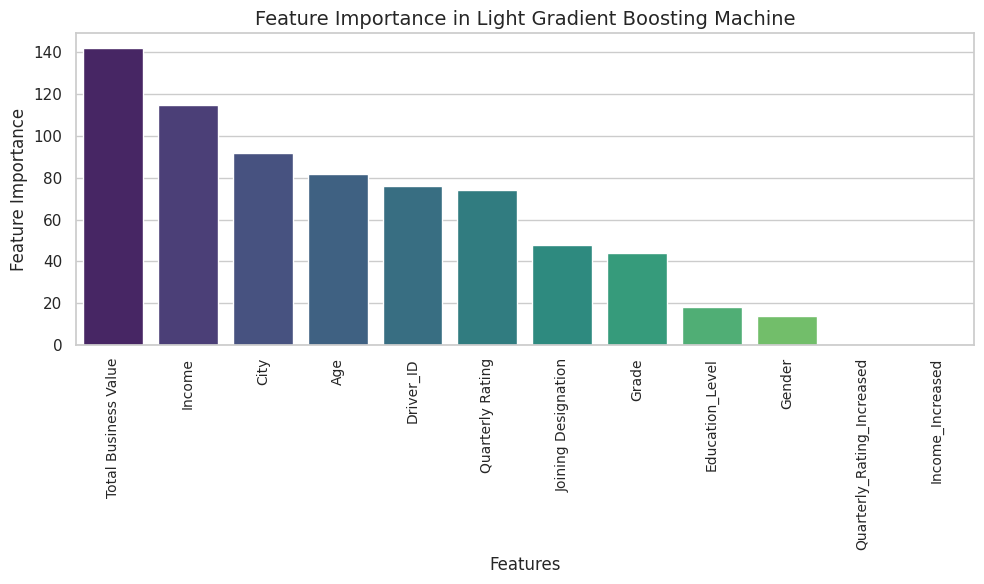

In [ ]:
# Set a style for the plot (e.g., clean, whitegrid)
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))  # Set figure size for better readability
ax = sns.barplot(x=coef_map["Features"], y=coef_map["Feature Importance"], palette="viridis")

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=10)

# Add labels and title
plt.xlabel("Features", fontsize=12)
plt.ylabel("Feature Importance", fontsize=12)
plt.title("Feature Importance in Light Gradient Boosting Machine", fontsize=14)

# Show the plot with proper layout
plt.tight_layout()
plt.show()


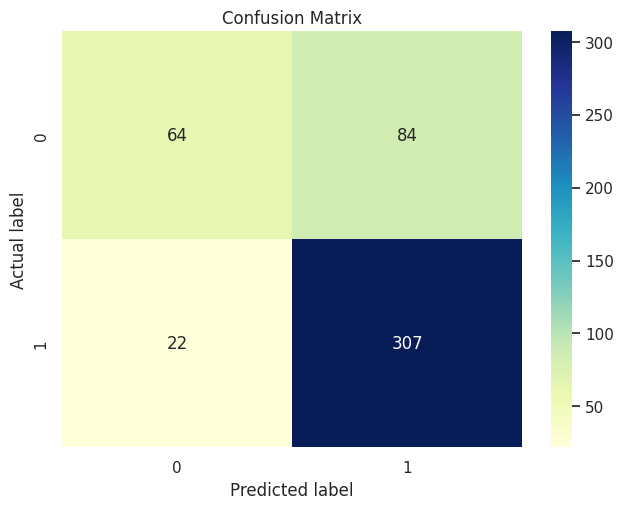

In [ ]:
cnf_matrix = confusion_matrix(y_test, lgb.predict(X_test))
fig, ax = plt.subplots()

#### create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()



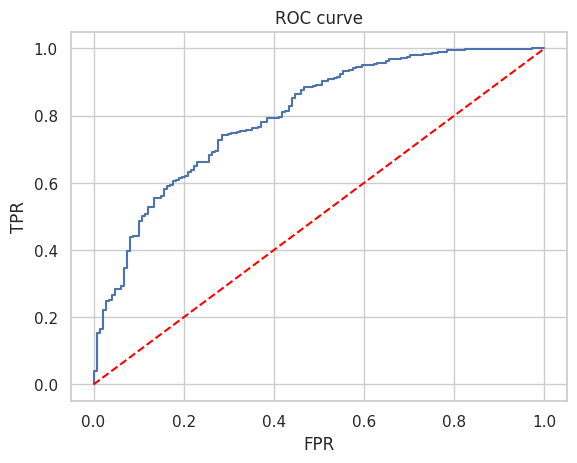

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
prob = lgb.predict_proba(X_test)
probabilites = prob[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Training
y_train_pred = lgb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_cm = confusion_matrix(y_train, y_train_pred)

# Test
y_test_pred = lgb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Displaying Training Set Performance
print(f'{"Training Set Performance":<30}')
print('------'*10)
print(f'{"Accuracy":<25} | {train_accuracy:.4f}')
print(f'{"Precision":<25} | {train_precision:.4f}')
print(f'{"Recall":<25} | {train_recall:.4f}')
print(f'{"F1 Score":<25} | {train_f1:.4f}')
print('------'*10)

# Displaying Test Set Performance
print(f'{"Test Set Performance":<30}')
print('------'*10)
print(f'{"Accuracy":<25} | {test_accuracy:.4f}')
print(f'{"Precision":<25} | {test_precision:.4f}')
print(f'{"Recall":<25} | {test_recall:.4f}')
print(f'{"F1 Score":<25} | {test_f1:.4f}')


Training Set Performance      
------------------------------------------------------------
Accuracy                  | 0.8209
Precision                 | 0.8087
Recall                    | 0.9627
F1 Score                  | 0.8790
------------------------------------------------------------
Test Set Performance          
------------------------------------------------------------
Accuracy                  | 0.7778
Precision                 | 0.7852
Recall                    | 0.9331
F1 Score                  | 0.8528


## <font color = Red>**Observations and Recommendations**</font>

###<font color = orange>**Observations** </font>

1. **Random Forest:**

*   **Accuracy:** The train and test accuracies are very close, indicating that the model is generalizing well. The model performs consistently with a slight overfitting tendency (train accuracy is marginally higher than test accuracy).
*   **Feature Importance:** The most important feature is Total Business Value (63.15% importance), followed by Quarterly Rating (16.64%) and Joining Designation (16.64%).
Less significant features include Driver_ID, Grade, and Gender, with relatively low importance.


2. **Gradient Boosting:**

*   **Accuracy:** The model performs better on the training set (82.09%) compared to the test set (77.78%), showing some degree of overfitting.
*   **Feature Importance:** Total Business Value is the most significant feature (42.51%), followed by Quarterly Rating (18.22%) and Joining Designation (11.69%).
Income, City, and Age have medium importance, with Quarterly_Rating_Increased and Income_Increased contributing almost nothing.

3. **HistGradientBoostingClassifier:**

*   **Accuracy:** Similar performance to Gradient Boosting, with train accuracy at 80.04% and test accuracy at 77.78%. Slight overfitting is present but not as in Gradient Boosting.
*   **Feature Importance:** Quarterly Rating and Total Business Value are the top two most important features, followed by Joining Designation.
Other features, such as Income, Age, and Driver_ID, show minimal importance. Interestingly, Income has a negative importance value (-0.0031), suggesting it might not be as predictive as other features.


4. **LightGBM:**

*   **Accuracy:** The performance is similar to the other models, with train accuracy at 82.09% and test accuracy at 77.78%. Again, there is slight overfitting on the training set.
*   **Feature Importance:** Total Business Value (142.0) and Income (115.0) are the most important features, followed by City (92.0) and Age (82.0).
The Quarterly Rating and Joining Designation are also important but with lower values.


###<font color = orange>**Inferences** </font>


1. **Important Features:**
 - Across all models, Total Business Value and Quarterly Rating consistently showed as the most important features. This suggests that a driver's business value and their quarterly rating are key indicators of their likelihood to churn.
 - Joining Designation also appears in the top three for most models, indicating that the initial role or position of the driver might play a significant role in churn prediction.
 - Income and Age have varying degrees of importance across different models, with some models suggesting they have little predictive power.

2. **Model Performance:**
 - All models (Random Forest, Gradient Boosting, HistGradientBoosting, LightGBM) show similar test accuracy around 77.78%, with minor variations between models.
 - Gradient Boosting and LightGBM perform slightly better in terms of training accuracy, indicating they may be more prone to overfitting.
 - HistGradientBoostingClassifier shows a balanced performance, comparable to other models, with moderate overfitting.

3. **Recall and Precision:**
 - All models show good recall scores, especially on the test set. This indicates that the models are good at identifying potential churners (i.e., true positives), which is important when trying to predict churn.
 - Precision is also good across models, ensuring that the predicted churners are likely to be actual churners.
 - F1 scores are also quite high, meaning the models balance both recall and precision well.



###<font color = orange>**Recommendations** </font>

1. **Focus on Key Features:**
 - Since Total Business Value and Quarterly Rating are consistently the most important predictors across models, it would be beneficial to focus on improving these factors to minimize churn.
 - Quarterly Rating could be used as a performance indicator and a tool for retention strategies.
 - Total Business Value should be tracked closely to identify high-value drivers who may be at risk.

2. **Address Income and Age:**
 - Even though Income and Age are less important in predicting churn, the models do show some variance in their importance. It might be useful to further investigate how these features influence churn

3. **Monitor Driver Engagement:**
 - Since Quarterly Rating and Joining Designation appear to be significant, it's worth considering retention strategies based on a driver's performance (quarterly ratings) and their tenure with the platform.

4. **Focus on Recall:**
 - Since recall is high across the models, the current approach works well for identifying potential churners. However, it's still important to verify that these churn predictions are meaningful and actionable.



# ------------------------------------------------Thnak You---------------------------------------